In [ ]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as scipyio
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

0/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 545.265318114, DQN Loss 8.49418286979, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 1083.74974971, DQN Loss 0.0512482319027, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 1110.21570023, DQN Loss 0.0139746869972, Epsilon 2.47032822921e-323
Evaluation Result: 1118.20179266


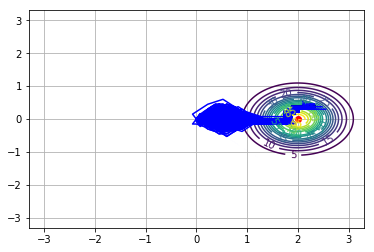

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f154bd3e1d0>> ignored


0/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 488.495629678, DQN Loss 24.1287629604, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 679.052357909, DQN Loss 11.3777644038, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 972.34192186, DQN Loss 0.51183626242, Epsilon 2.47032822921e-323
Evaluation Result: 1017.9609486


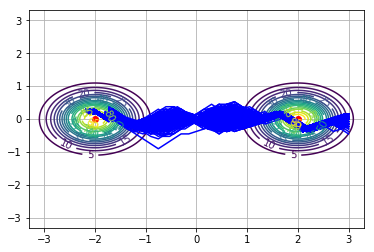

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f14d9fa3f90>> ignored


0/5 Experiment with 2/4 Goals, Start
[1000/3000] Avg Total Reward 677.209326564, DQN Loss 41.4719274044, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 1526.69554316, DQN Loss 0.344530014321, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 1561.99935853, DQN Loss 0.068393190857, Epsilon 2.47032822921e-323
Evaluation Result: 1578.65985736


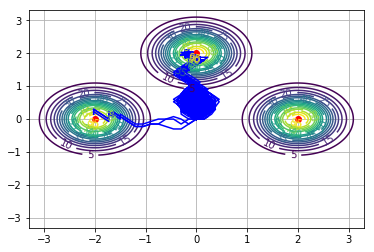

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f14d85a9850>> ignored


0/5 Experiment with 3/4 Goals, Start
[1000/3000] Avg Total Reward 420.084395709, DQN Loss 15.4656966031, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 975.703431785, DQN Loss 1.09694492631, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 1152.23889871, DQN Loss 0.462452230975, Epsilon 2.47032822921e-323
Evaluation Result: 1213.31276316


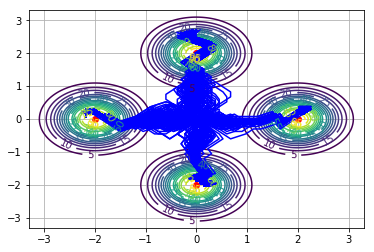

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f14d81e8a10>> ignored


1/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 614.674060097, DQN Loss 26.3560909629, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 1360.34140225, DQN Loss 0.236730372068, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 1373.67805466, DQN Loss 0.0372620623093, Epsilon 2.47032822921e-323
Evaluation Result: 1372.54093939


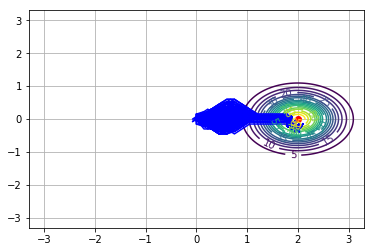

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f150c6e8a50>> ignored


1/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 596.009029868, DQN Loss 20.3441608548, Epsilon 2.47032822921e-323
[2000/3000] Avg Total Reward 1281.63633298, DQN Loss 0.419865637086, Epsilon 2.47032822921e-323
[3000/3000] Avg Total Reward 1322.39012201, DQN Loss 0.111835193355, Epsilon 2.47032822921e-323
Evaluation Result: 1346.15492488


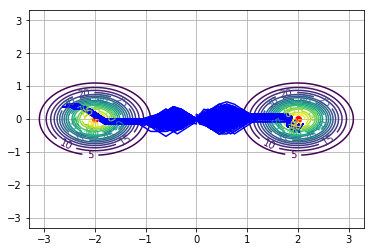

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f154b85d290>> ignored


1/5 Experiment with 2/4 Goals, Start


In [ ]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]

n_exp = 5
n_goal = 4
n_eval = 500
for i_exp in range(n_exp):
    for i_goal in range(n_goal):
        exp = multi_experiment.Experiments(seed=i_exp,action_res=[5,5],nr_goal=i_goal+1,discount=0.7,dqn_hidden_spec=dqn_hidden_spec,
                             max_epi=3000,max_step=20,
                             batch_size=2000,learning_rate=1e-4,target_update_period=25,
                             replay_memory_size=50000,eps_decay_rate=0.9, strategy="Softmax",scale=1.)
        print("{}/{} Experiment with {}/{} Goals, Start".format(i_exp,n_exp,i_goal,n_goal))
        
        return_list = exp.run(display_period=1000)
        eval_list, info_list = exp.evaluation(max_eval_epi=n_eval)
        exp.env.plot_paths(info_list)
        plt.draw()
        plt.pause(0.005)
        
        data = {"return_list":return_list,"eval_list":eval_list, "info_list":info_list}        
        data_file_name = "MultiGoal_Softmax_Goal"+str(i_goal+1)+"Trial"+str(i_exp)+".mat"
        scipyio.savemat(data_file_name, data)
        
print("{} is finished and is saved".format(data_file_name))